# iceberg demo

This notebook demonstrates simple uses of the icebergs module.

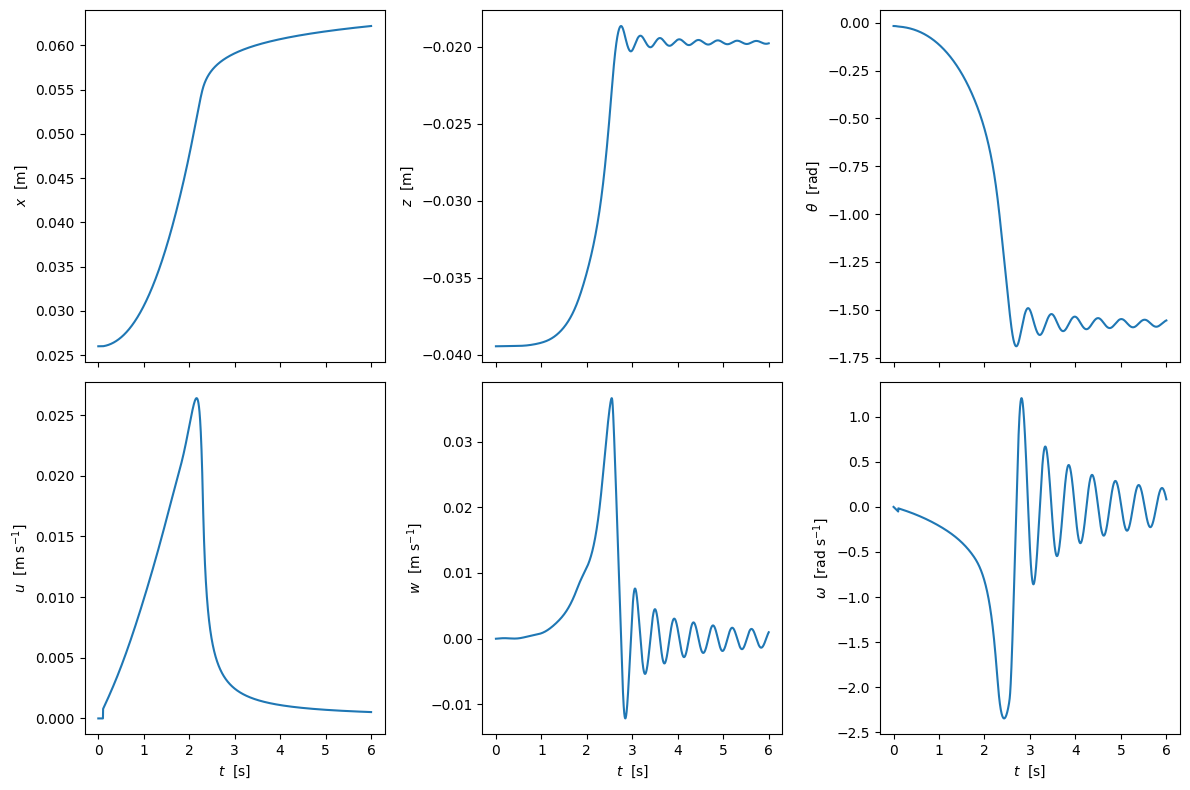

In [1]:
#########################################
##                                     ##
## This example is from the README     ##
##                                     ##
#########################################

import icebergs
import numpy as np
import matplotlib.pyplot as plt

def init_depth(rho_i, rho_w, H):
    """Returns an appropriate initial depth for the iceberg, based on hydrostatic balance"""
    return (0.5 - (rho_i/rho_w)) * H

# Initialise the iceberg shape (`rect`), and the iceberg (`berg`) itself.
width = 0.05; height = 0.1
rect = icebergs.Rectangle(width, height)
berg = icebergs.Iceberg2D(rect)

# Set the initial position and orientation of the iceberg.
theta_deg = -1.0
theta = theta_deg * np.pi / 180
z_init = init_depth(berg.density_ice, berg.density_water, rect.b)
berg.set_position(x=0.026, z=z_init, theta=theta)

# Set model parameters
timestep = 0.002   # The model time step
gamma_u = 500.     # The horizontal quadratic drag coefficient
gamma_w = 500.     # The vertical quadratic drag coefficient
gamma_omega = 3.   # The angular quadratic drag coefficient
xwall = 0.0        # The horizontal location of the vertical wall
restitution = 0.0  # The coefficient of restitution for iceberg-wall collisions

# Configure the solver.
# n_chunks * n_steps gives the total number of timesteps
n_chunks = 300
n_steps = 10
solver = icebergs.DynamicsSolver(timestep, 
                                 gamma_u, 
                                 gamma_w, 
                                 gamma_omega, 
                                 xwall, 
                                 restitution, 
                                 n_chunks*n_steps
                                )

# Run the solver.
# If plot=True, displays a plot after every `n_steps` timesteps, producing `n_chunks` plots.
# If saveplot=True, saves these plots as PNG files to the `./plots/iceberg` directory.
# The suggested plotlims makes a nice video for these parameter values.
plotlims = [-width, 1.5 * (width + height), -1.5 * height, 1.5 * height]
for _ in range(n_chunks):    
    solver.simulate(berg, n_steps, 
                    plot=False, 
                    saveplot=False, 
                    plotlims=plotlims
                   )

# Optional: plot the trajectory.
# Produces separate plots of x, z, theta, u, w, and omega against time.
solver.plot_trajectory()
plt.savefig("./plots/trajectory.png", dpi=150)

# Optional, convert the plots to a video.
# In the solver.simulate() argument list, plot and saveplot must both be set to True.
# The video will be saved at `./videos/iceberg.mp4`
# Required: otgraph, my plotting utilities package, available at https://github.com/oscarjtg/otgraph
#import otgraph.video as vid
#vid.pngs_to_mp4("./plots/iceberg", "./videos/iceberg", fps=30)

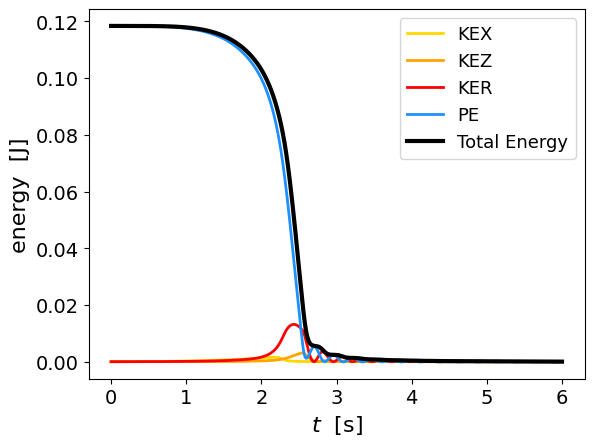

In [2]:
solver.plot_energy()
plt.savefig("./plots/energy.png", dpi=150);

# Interactive example

This example showcases the plotting utility of the Iceberg2D class

In [3]:
from ipywidgets import interact
rect = icebergs.Rectangle(10, 20)
@interact(x=(0, 10, 0.2), z=(-10, 0, 0.2), theta_deg=(0, 90, 1))
def plot_iceberg(x=0.0, z=0.0, theta_deg=10.0):
    theta = theta_deg * np.pi / 180
    berg = icebergs.Iceberg2D(rect, x=x, z=z, theta=theta)
    berg.plot_iceberg()

interactive(children=(FloatSlider(value=0.0, description='x', max=10.0, step=0.2), FloatSlider(value=0.0, desc…

In [4]:
import icebergs
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

In [5]:
rect = icebergs.Rectangle(10, 20)
rect.display()

Polygon info:
Number of vertices: 4
Point2D vertex 1: x = 5.0, z = -10.0
Point2D vertex 2: x = 5.0, z = 10.0
Point2D vertex 3: x = -5.0, z = 10.0
Point2D vertex 4: x = -5.0, z = -10.0
Area: 200.0
Centroid: x = 0.0 , z = 0.0
Ix: 1666.6666666666667
Iy: 8333.333333333334
Iz: 6666.666666666667


In [6]:
def Iy_rectangle(H, eps, L=1.0, rho=1.0):
    return (1./12.) * H**4 * eps * (1. + eps**2) * rho

print(Iy_rectangle(20, 0.5))

8333.333333333332
